# Aplicar técnicas de Mineração de Dados, utilizando o algoritmo de Clusterização para agrupar as informações e notas dos candidatos

## Área de agrupamentos: Matemática; Fundamentos da Computação; Tecnologias da Computação


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import services.lista_estados_regioes as ler

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


## Descrição dos dados

In [2]:
dados = pd.read_csv('dados/df_poscomp.csv')
# dados = dados.drop(columns='INSCRICAO')
dados.head()

,SEXO,ESTADO,REGIAO,IDADE,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
0,1,5,1,33,Outras Áreas,S,0,3.0,3.0,2.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2016,14.0,21.0,10.0
1,1,20,4,28,engenharia de software,S,0,3.0,2.0,3.0,...,2.0,1.0,3.0,1.0,2.0,1.0,2016,16.0,22.0,12.0
2,1,24,3,31,engenharia de software,S,0,0.0,1.0,1.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2016,4.0,16.0,8.0
3,1,13,0,36,engenharia de software,S,0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2016,4.0,13.0,7.0
4,0,3,0,25,computação gráfica,S,0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,1.0,1.0,2016,6.0,15.0,11.0


> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|1|Masculino|
|0|Feminino|

> ### UF
> ***

|Código|Descrição|
|---|---|
|0|AC|
|1|AL|
|2|AP|
|3|AM|
|4|BA|
|5|CE|
|6|DF|
|7|ES|
|8|GO|
|9|MA|
|10|MT|
|11|MS|
|12|MG|
|13|PA|
|14|PB|
|15|PR|
|16|PE|
|17|PI|
|18|RJ|
|19|RN|
|20|RS|
|21|RO|
|22|RR|
|23|SC|
|24|SP|
|25|SE|
|26|TO|

> ### Cargo
> ***

|Código|Descrição|
|---|---|
|0|Mestrado/Doutorado|
|1|Autoavaliação|

> ### Região
> ***

|Código|Descrição|
|---|---|
|0|norte|
|1|nordeste|
|2|centro_oeste|
|3|sudeste|
|4|sul|

> ### Situação
> ***

|Código|Descrição|
|---|---|
|0|Ausente|
|1|Presente|

## Analise Explorária dos Dados

Quantas pessoas são do sexo masculino e feminino

In [3]:
frequencia_sexo = dados['SEXO'].value_counts() 

percentual_sexo = dados['SEXO'].value_counts(normalize = True) * 100 

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentagem (%)': percentual_sexo.round(2)})
dist_freq_qualitativas.rename (index = {1: 'Masculino', 0: 'Feminino', 3: 'Total'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,11187,83.01
Feminino,2290,16.99


Qual a média, mediana e máximo?

In [4]:
estados = {
    0: 'Acre',
    1: 'Alagoas',
    2: 'Amapá',
    3: 'Amazonas',
    4: 'Bahia',
    5: 'Ceará',
    6: 'Distrito Federal',
    7: 'Espírito Santo',
    8: 'Goiás',
    9: 'Maranhão',
    10: 'Mato Grosso',
    11: 'Mato Grosso do Sul',
    12: 'Minas Gerais',
    13: 'Pará',
    14: 'Paraíba',
    15: 'Paraná',
    16: 'Pernambuco',
    17: 'Piauí',
    18: 'Rio de Janeiro',
    19: 'Rio Grande do Norte',
    20: 'Rio Grande do Sul',
    21: 'Rondônia',
    22: 'Roraima',
    23: 'Santa Catarina',
    24: 'São Paulo',
    25: 'Sergipe',
    26: 'Tocantins'
}

estados_brasileiros = {
    0: 'AC',
    1: 'AL',
    2: 'AP',
    3: 'AM',
    4: 'BA',
    5: 'CE',
    6: 'DF',
    7: 'ES',
    8: 'GO',
    9: 'MA',
    10: 'MT',
    11: 'MS',
    12: 'MG',
    13: 'PA',
    14: 'PB',
    15: 'PR',
    16: 'PE',
    17: 'PI',
    18: 'RJ',
    19: 'RN',
    20: 'RS',
    21: 'RO',
    22: 'RR',
    23: 'SC',
    24: 'SP',
    25: 'SE',
    26: 'TO'
}

In [5]:
regioes = {
    0: 'Norte',
    1: 'Nordeste',
    2: 'Centro-Oeste',
    3: 'Sudeste',
    4: 'Sul'
}

In [6]:
renda_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                            'fundamentos_computacao': ['mean', 'median', 'max', 'std'],
                                                            'tecnologia_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index= estados)

matematica                        fundamentos_computacao  \
                          mean median   max       std                   mean   
ESTADO                                                                         
Acre                  5.666667    5.5  15.0  5.819507               9.333333   
Alagoas               6.079070    7.0  15.0  4.277553              10.297674   
Amapá                 4.000000    3.5  12.0  3.577709               7.500000   
Amazonas              4.932692    6.0  15.0  3.713697               9.317308   
Bahia                 5.701220    6.0  15.0  3.946234              11.000000   
Ceará                 7.106838    7.0  18.0  4.277298              12.017094   
Distrito Federal      7.318681    8.0  20.0  5.232121              12.000000   
Espírito Santo        6.947020    7.0  19.0  4.404525              11.578366   
Goiás                 6.041353    6.0  17.0  3.810752              11.184211   
Maranhão              6.079365    6.0  17.0  3.799211              10.727513   
Mato Grosso           5.734463    6.0  17.0  3.833554              10.468927   
Mato Grosso do Sul    6.443820    7.0  18.0  4.003239              11.445693   
Minas Gerais          7.110562    7.0  20.0  4.257416              12.280420   
Pará                  5.397626    6.0  17.0  3.577093               9.709199   
Paraíba               6.509116    7.0  19.0  3.803124              11.921459   
Paraná                6.638889    7.0  20.0  3.978473              12.043103   
Pernambuco            6.693548    7.0  16.0  4.448572              10.983871   
Piauí                 5.503448    6.0  16.0  3.699154              10.257471   
Rio de Janeiro        6.929638    8.0  19.0  5.290832              10.744136   
Rio Grande do Norte   6.690000    7.0  20.0  4.459071              11.550000   
Rio Grande do Sul     6.666397    7.0  20.0  4.181920              11.844103   
Rondônia              4.600000    5.0  11.0  3.840573               7.840000   
Roraima               3.714286    5.0   7.0  2.811541               7.714286   
Santa Catarina        6.406897    7.0  20.0  4.161280              11.473103   
São Paulo             6.678399    7.0  20.0  4.550632              11.152649   
Sergipe               6.666667    7.0  20.0  4.421783              11.712121   
Tocantins             5.539683    6.0  14.0  3.888882              10.301587   

                                           tecnologia_computacao               \
                    median   max       std                  mean median   max   
ESTADO                                                                          
Acre                  12.0  17.0  7.501111              5.000000    6.0  10.0   
Alagoas               12.0  23.0  6.611710              6.018605    7.0  15.0   
Amapá                  9.0  14.0  4.966555              5.875000    6.5  11.0   
Amazonas              11.0  20.0  6.366271              5.269231    6.0  12.0   
Bahia                 13.0  24.0  6.669222              6.067073    7.0  15.0   
Ceará                 13.0  25.0  6.211420              6.849003    7.0  16.0   
Distrito Federal      14.0  23.0  7.574812              6.747253    8.0  15.0   
Espírito Santo        13.0  28.0  6.313433              6.485651    7.0  16.0   
Goiás                 12.0  24.0  5.960944              6.281955    7.0  15.0   
Maranhão              12.0  21.0  5.868346              6.457672    7.0  14.0   
Mato Grosso           12.0  24.0  6.420882              5.903955    6.0  14.0   
Mato Grosso do Sul    13.0  24.0  6.011859              6.076779    6.0  16.0   
Minas Gerais          14.0  26.0  6.316473              6.694256    7.0  16.0   
Pará                  11.0  25.0  5.760320              5.810089    6.0  15.0   
Paraíba               13.0  26.0  5.972973              6.657784    7.0  16.0   
Paraná                13.0  25.0  6.222085              6.810345    7.0  15.0   
Pernambuco            12.0  25.0  6.431205              5.741935    6.5  15.0   

#### Geração de gráficos da áreas de matemática, fundamentos da computação e tecnologia da computação

In [7]:
media_estatisticas_por_uf = dados.groupby(['ESTADO']).agg({'matematica': ['mean'],
                                                            'fundamentos_computacao': ['mean'],
                                                            'tecnologia_computacao': ['mean']})
media_estatisticas_por_uf = media_estatisticas_por_uf.rename(index=estados_brasileiros)

In [8]:
por_uf = dados.groupby(['ESTADO', 'REGIAO']).agg({'matematica': 'mean',
                                                            'fundamentos_computacao': 'mean',
                                                            'tecnologia_computacao': 'mean'})
# por_uf = por_uf.rename(columns={'ESTADO':estados_brasileiros, 'REGIAO':regioes}, index=)
por_uf = por_uf.reset_index()
por_uf['ESTADO'] = por_uf['ESTADO'].replace(estados_brasileiros)
por_uf['REGIAO'] = por_uf['REGIAO'].replace(regioes)

por_uf['candidatos'] = dados['ESTADO'].value_counts()

por_uf

,ESTADO,REGIAO,matematica,fundamentos_computacao,tecnologia_computacao,candidatos
0,AC,Norte,5.666667,9.333333,5.000000,6
1,AL,Nordeste,6.079070,10.297674,6.018605,215
2,AP,Norte,4.000000,7.500000,5.875000,16
3,AM,Norte,4.932692,9.317308,5.269231,104
4,BA,Nordeste,5.701220,11.000000,6.067073,164
5,CE,Nordeste,7.106838,12.017094,6.849003,702
6,DF,Centro-Oeste,7.318681,12.000000,6.747253,91
7,ES,Sudeste,6.947020,11.578366,6.485651,453
8,GO,Centro-Oeste,6.041353,11.184211,6.281955,532
9,MA,Nordeste,6.079365,10.727513,6.457672,378


In [9]:
df_media_uf = por_uf.sort_values(['candidatos'], ascending=False)
df_media_uf['candidatos'] = df_media_uf['candidatos'].fillna(0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


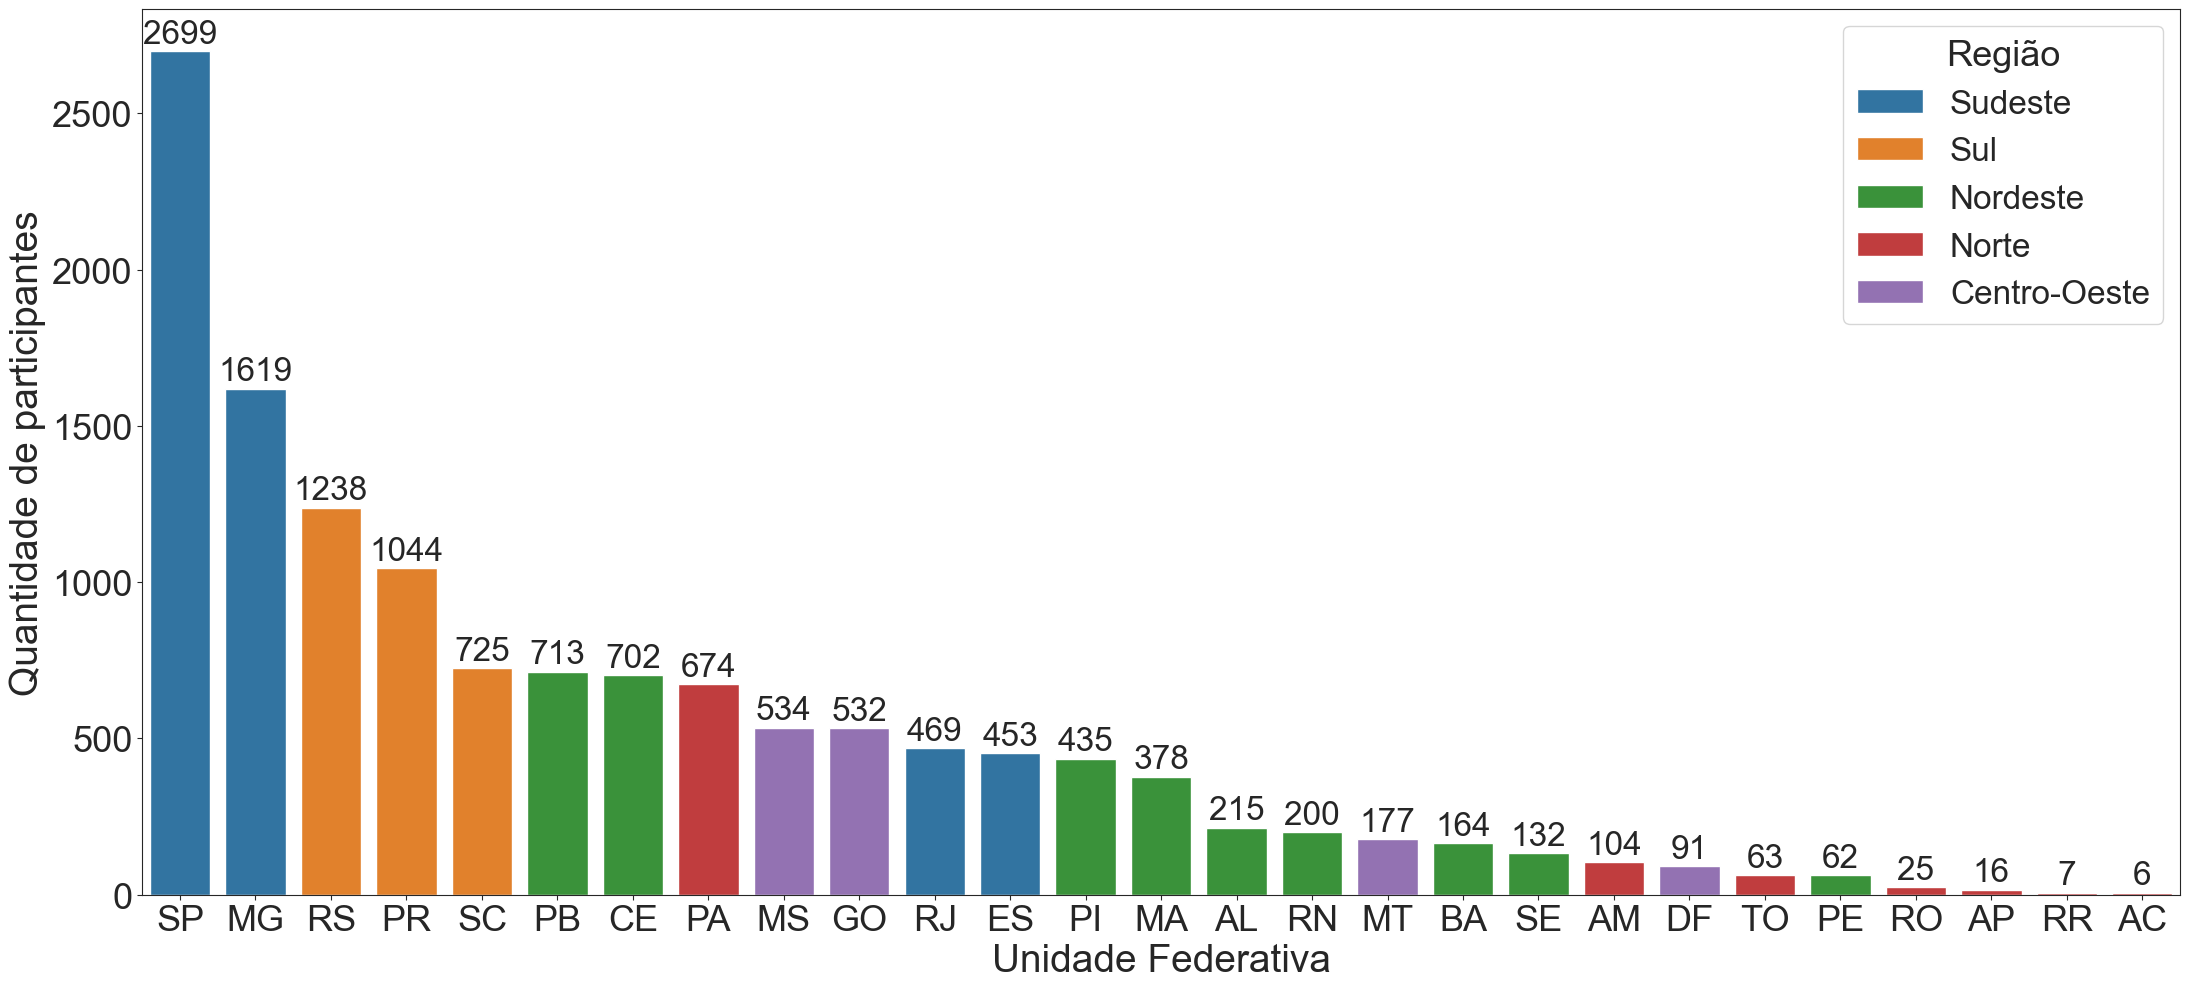

In [10]:
import math

plt.figure(figsize=(22,10))
sns.set_style(style='ticks')
ax = sns.barplot(data=por_uf.sort_values(['candidatos'], ascending=False),
            y='candidatos',
            x='ESTADO',
            hue='REGIAO',
            dodge=False,
            # color='hsv'
           )
for p in ax.patches:
    if not math.isnan(p.get_height()):
        ax.annotate(int(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 1),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=24)
plt.xlabel('Unidade Federativa', fontsize=28)
plt.ylabel('Quantidade de participantes', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.tight_layout()
legend = plt.legend(title='Região', fontsize=24)
legend.get_title().set_fontsize(26)
plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
plt.show()

In [11]:
por_sexo_estado = dados.groupby(['ESTADO', 'SEXO']).size().reset_index(name='candidatos')

por_sexo_estado['ESTADO'] = por_sexo_estado['ESTADO'].replace(estados_brasileiros)
por_sexo_estado['SEXO'] = por_sexo_estado['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

total_inscritos_sexo = por_sexo_estado['candidatos'].sum()

# Calcula a porcentagem de candidatos inscritos por região
por_sexo_estado['porcentagem'] = (por_sexo_estado['candidatos'] / total_inscritos_sexo) * 100
por_sexo_estado

,ESTADO,SEXO,candidatos,porcentagem
0,AC,Feminino,1,0.007420
1,AC,Masculino,5,0.037100
2,AL,Feminino,22,0.163241
3,AL,Masculino,193,1.432069
4,AP,Feminino,1,0.007420
5,AP,Masculino,15,0.111301
6,AM,Feminino,30,0.222601
7,AM,Masculino,74,0.549084
8,BA,Feminino,31,0.230022
9,BA,Masculino,133,0.986867


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


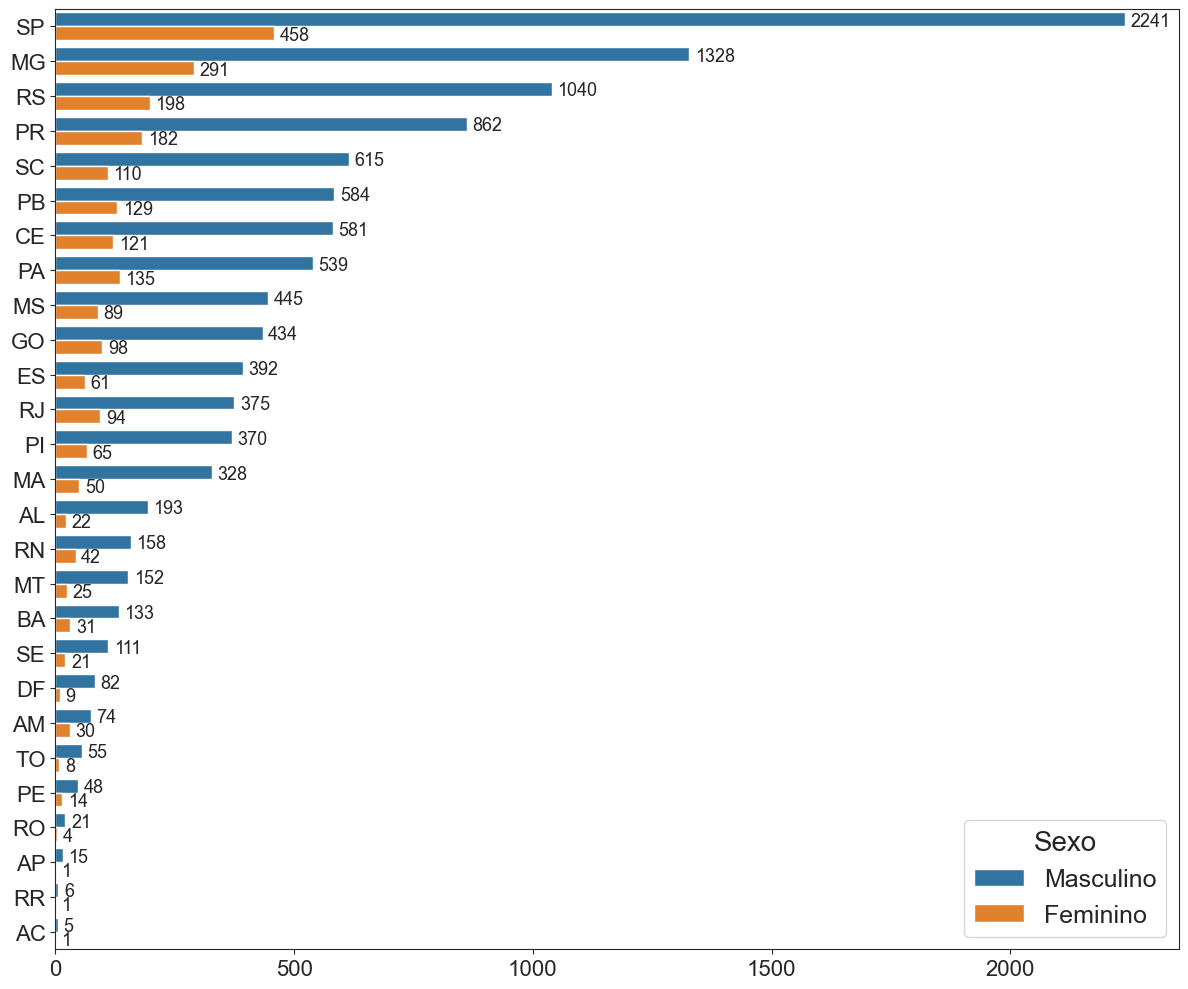

In [12]:
plt.figure(figsize=(12,10))
sns.set_style(style='ticks')

ax = sns.barplot(data=por_sexo_estado.sort_values(['candidatos'], ascending=False),
                 x='candidatos',
                 y='ESTADO',
                 hue='SEXO')

for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                           ha='left', va='center', xytext=(4, -1), textcoords='offset points', fontsize=13)

plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico
legend = plt.legend(title='Sexo', loc='lower right', fontsize=18)
legend.get_title().set_fontsize(20)
plt.savefig('imagens/inscritos_sexo.eps', dpi=600, bbox_inches='tight')
plt.show()

In [13]:
# Agrupar os dados por estado e sexo e calcular a contagem de candidatos
dados_agrupados = por_sexo_estado.groupby(['ESTADO', 'SEXO']).sum().reset_index()

# Iterar sobre os grupos e exibir as informações
for index, row in dados_agrupados.iterrows():
    estado = row['ESTADO']
    sexo = row['SEXO']
    candidatos = row['candidatos']
    print(f"{estado} - {sexo}: {candidatos} candidatos")

AC - Feminino: 1 candidatos
AC - Masculino: 5 candidatos
AL - Feminino: 22 candidatos
AL - Masculino: 193 candidatos
AM - Feminino: 30 candidatos
AM - Masculino: 74 candidatos
AP - Feminino: 1 candidatos
AP - Masculino: 15 candidatos
BA - Feminino: 31 candidatos
BA - Masculino: 133 candidatos
CE - Feminino: 121 candidatos
CE - Masculino: 581 candidatos
DF - Feminino: 9 candidatos
DF - Masculino: 82 candidatos
ES - Feminino: 61 candidatos
ES - Masculino: 392 candidatos
GO - Feminino: 98 candidatos
GO - Masculino: 434 candidatos
MA - Feminino: 50 candidatos
MA - Masculino: 328 candidatos
MG - Feminino: 291 candidatos
MG - Masculino: 1328 candidatos
MS - Feminino: 89 candidatos
MS - Masculino: 445 candidatos
MT - Feminino: 25 candidatos
MT - Masculino: 152 candidatos
PA - Feminino: 135 candidatos
PA - Masculino: 539 candidatos
PB - Feminino: 129 candidatos
PB - Masculino: 584 candidatos
PE - Feminino: 14 candidatos
PE - Masculino: 48 candidatos
PI - Feminino: 65 candidatos
PI - Masculino:

In [14]:
por_regiao = dados.groupby(['REGIAO']).agg({'matematica': 'mean',
                                                            'fundamentos_computacao': 'mean',
                                                            'tecnologia_computacao': 'mean'})
# por_uf = por_uf.rename(columns={'ESTADO':estados_brasileiros, 'REGIAO':regioes}, index=)
por_regiao = por_regiao.reset_index()
# por_regiao['ESTADO'] = por_regiao['ESTADO'].replace(estados)
por_regiao['REGIAO'] = por_regiao['REGIAO'].replace(regioes)

por_regiao['candidatos'] = dados['REGIAO'].value_counts()

por_regiao

,REGIAO,matematica,fundamentos_computacao,tecnologia_computacao,candidatos
0,Norte,5.294972,9.595531,5.711732,895
1,Nordeste,6.396868,11.332223,6.476508,3001
2,Centro-Oeste,6.248876,11.249625,6.181409,1334
3,Sudeste,6.857634,11.501336,6.376527,5240
4,Sul,6.594280,11.823745,6.756901,3007


In [15]:
por_regiao
# total_inscritos

,REGIAO,matematica,fundamentos_computacao,tecnologia_computacao,candidatos
0,Norte,5.294972,9.595531,5.711732,895
1,Nordeste,6.396868,11.332223,6.476508,3001
2,Centro-Oeste,6.248876,11.249625,6.181409,1334
3,Sudeste,6.857634,11.501336,6.376527,5240
4,Sul,6.594280,11.823745,6.756901,3007


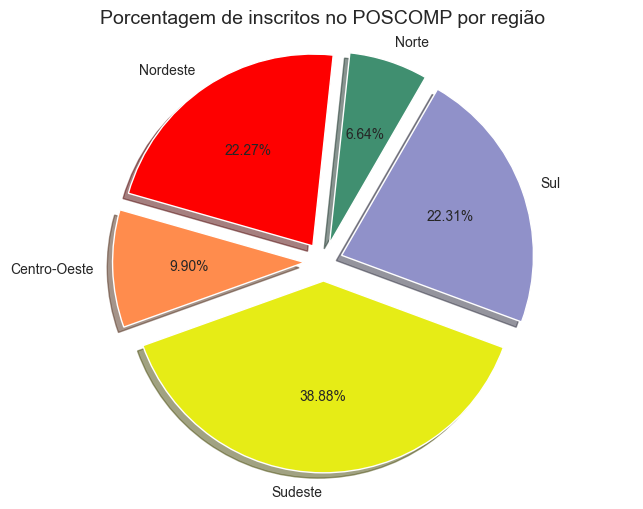

In [16]:
total_inscritos = por_regiao['candidatos'].sum()

# Calcula a porcentagem de candidatos inscritos por região
por_regiao['porcentagem'] = (por_regiao['candidatos'] / total_inscritos) * 100
colors = ['#408F70', '#FE0000', '#FF8C4D', '#E6EC16', '#9091C9']

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Criação do gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(por_regiao['porcentagem'], labels=por_regiao['REGIAO'], autopct='%.2f%%',
        colors=colors, explode=explode, shadow=True, startangle=60)
plt.title("Porcentagem de inscritos no POSCOMP por região", fontsize=14)
plt.axis('equal')
plt.show()

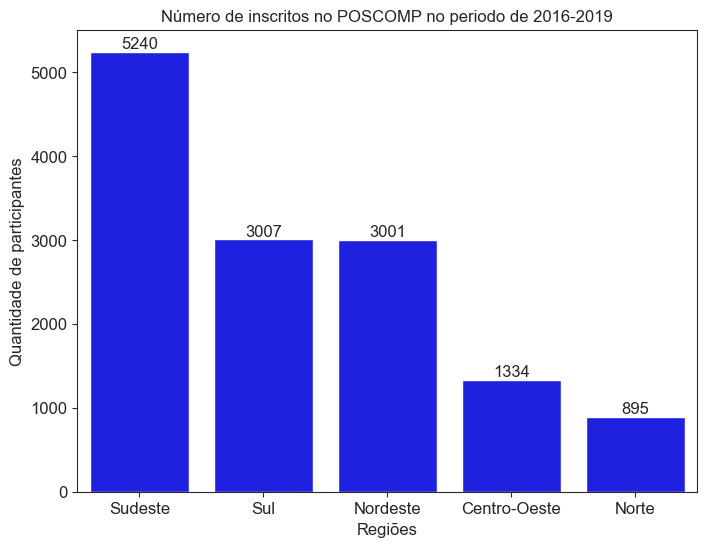

In [17]:
    plt.figure(figsize=(8,6))
    df_media_regiao = por_regiao.sort_values(['candidatos'], ascending=False)
    sns.set_style(style='ticks')
    plot = sns.barplot(data=df_media_regiao,
                y='candidatos',
                x='REGIAO',
                # hue='',
                dodge=False,
                color='Blue',
               );
    for p in plot.patches:
        plt.annotate(int(p.get_height()),
                    (p.get_x() + p.get_width() / 2,p.get_height()),
                    ha='center', va='bottom',fontsize=12)
    # Adicionar legenda nos eixos
    # plt.legend(fontsize=10)
    plt.title("Número de inscritos no POSCOMP no periodo de 2016-2019", fontsize=12)
    plt.xlabel('Regiões', fontsize=12)
    plt.ylabel('Quantidade de participantes', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [18]:
# lista_eixo = {'matematica': 'Matemática',
#            'fundamentos_computacao': 'Fundamentos da Computação',
#            'tecnologia_computacao': 'Tecnologia da Computação'}
# for i in lista_eixo:
#     plt.figure(figsize=(18,10))
#     df_media_uf = por_uf.sort_values([i], ascending=False)
#     sns.set_theme(style="ticks")
#     plot = sns.barplot(data=df_media_uf,
#                 y=i,
#                 x='ESTADO',
#                 hue='REGIAO',
#                 dodge=False,
#                );
#     for p in plot.patches:
#         plt.annotate('{0:.2f}'.format(p.get_height()),
#                     (p.get_x() + p.get_width() / 2,p.get_height()),
#                     ha='center', va='bottom')
#     # Adicionar legenda nos eixos
#     plt.legend(fontsize=10)
#     plt.title(lista_eixo[i], fontsize=18)
#     plt.xlabel('Unidade Federativa', fontsize=18)
#     plt.ylabel('Médias das notas', fontsize=18)
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
#     plt.show()

In [19]:
# import geopandas as gpd
# %matplotlib inline

# INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
# INFOS_UFS.columns

# # print("Estado: " + INFOS_UFS.nome[18])
# # INFOS_UFS.geometry[18]

# INFOS_UFS.rename({'sigla': 'ESTADO'}, axis=1, inplace=True)

# BRASIL = INFOS_UFS.merge(por_uf, on='ESTADO', how='left')
# # BRASIL[['ESTADO', 'mean']].head()
# BRASIL = BRASIL.to_crs(epsg=3395)

# lista_area = {'matematica': 'Matemática',
#            'fundamentos_computacao': 'Fundamentos da Computação',
#            'tecnologia_computacao': 'Tecnologia da Computação'}
# for area in lista_area:
#     ax = BRASIL.plot(column= area,
#                cmap = 'Blues',
#                figsize = (16,10),
#                legend = True,
#                edgecolor = 'black');
#     plt.title(lista_area[area], fontsize=14)
#     for i in BRASIL.index:
#         plt.text(BRASIL.geometry.centroid[i].coords[0][0], BRASIL.geometry.centroid[i].coords[0][1], BRASIL.ESTADO[i],
#                  fontsize=10, horizontalalignment='center', verticalalignment='center', )

#     ax.set_axis_off();

In [20]:
renda_estatisticas_por_regiao = dados.groupby(['REGIAO']).agg({'matematica': ['mean', 'median', 'max', 'std'],
                                                              'fundamentos_computacao': ['mean', 'median', 'max', 'std'],
                                                              'tecnologia_computacao': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_regiao.rename(index= regioes)

matematica                        fundamentos_computacao         \
                   mean median   max       std                   mean median   
REGIAO                                                                         
Norte          5.294972    6.0  17.0  3.635231               9.595531   11.0   
Nordeste       6.396868    7.0  20.0  4.064658              11.332223   13.0   
Centro-Oeste   6.248876    7.0  20.0  4.015851              11.249625   12.0   
Sudeste        6.857634    7.0  20.0  4.524831              11.501336   13.0   
Sul            6.594280    7.0  20.0  4.107384              11.823745   13.0   

                             tecnologia_computacao                         
               max       std                  mean median   max       std  
REGIAO                                                                     
Norte         25.0  5.943205              5.711732    6.0  15.0  3.733221  
Nordeste      26.0  6.234842              6.476508    7.0  16.0  3.826948  
Centro-Oeste  24.0  6.169272              6.181409    7.0  16.0  3.680620  
Sudeste       28.0  6.643658              6.376527    7.0  16.0  3.938013  
Sul           28.0  6.384096              6.756901    7.0  18.0  3.849864

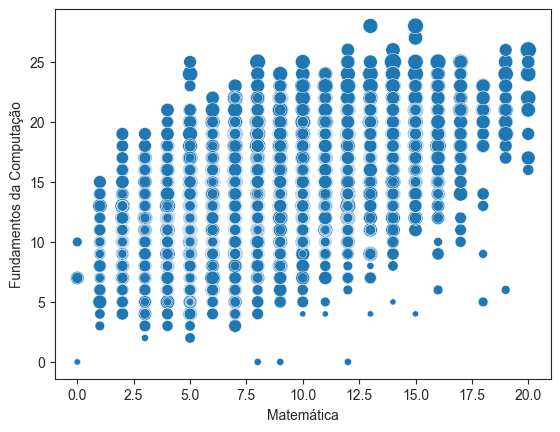

<Figure size 1000x600 with 0 Axes>

In [21]:

sns.scatterplot(data=dados, x="matematica", y="fundamentos_computacao", size="tecnologia_computacao", legend=False, sizes=(20, 150))

plt.xlabel("Matemática")
plt.ylabel("Fundamentos da Computação")

plt.figure(figsize=(10, 6))

plt.show()

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13477 entries, 0 to 13476
Data columns (total 36 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SEXO                                             13477 non-null  int64  
 1   ESTADO                                           13477 non-null  int64  
 2   REGIAO                                           13477 non-null  int64  
 3   IDADE                                            13477 non-null  int64  
 4   ESPECIALIDADE                                    13477 non-null  object 
 5   PRESENTE                                         13477 non-null  object 
 6   CARGO                                            13477 non-null  int64  
 7   Matemática Discreta                              10977 non-null  float64
 8   Cálculo Diferencial e Integral                   10977 non-null  float64
 9   Álgebra Linear              

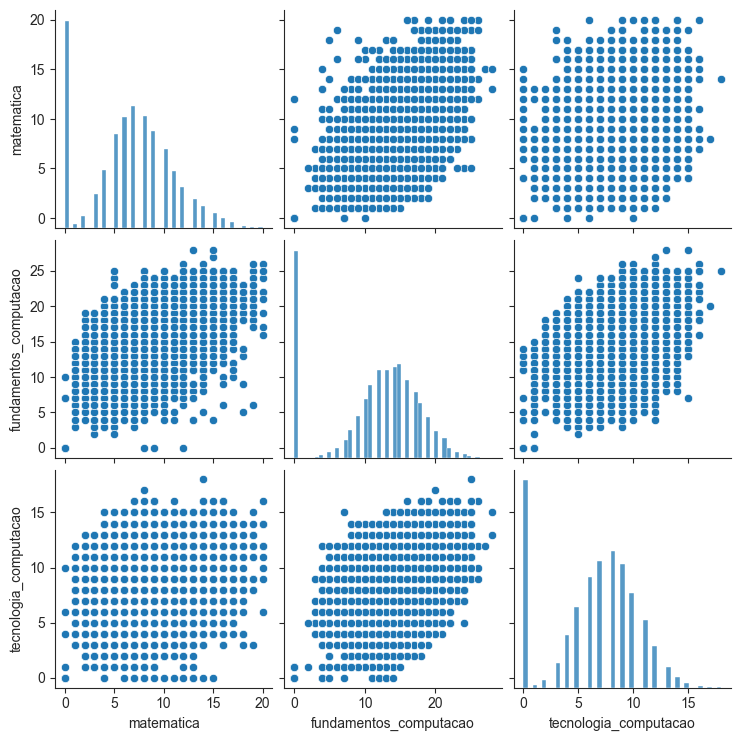

In [23]:
dados_eixo_area = dados.iloc[:,33:36]
sns.pairplot(dados_eixo_area)
plt.show()

In [24]:
ano = [2016,2017,2018,2019]

In [25]:
import matplotlib.pyplot as plt

def plot_metric(materials_name, values, metric):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(materials_name, values)
    
    if metric == 'media':
        ax.set_xlabel('Média das notas')
        ax.set_title('Média das notas por disciplina', fontsize=18)
    elif metric == 'desvio_padrao':
        ax.set_xlabel('Desvio Padrão')
        ax.set_title('Desvio Padrão das notas por disciplina', fontsize=18)
    
    ax.set_ylabel('Disciplinas')
    plt.show()

In [26]:
dados.query('ESPECIALIDADE == "outras áreas"')

,SEXO,ESTADO,REGIAO,IDADE,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao


In [27]:
dados_teste = dados.copy()

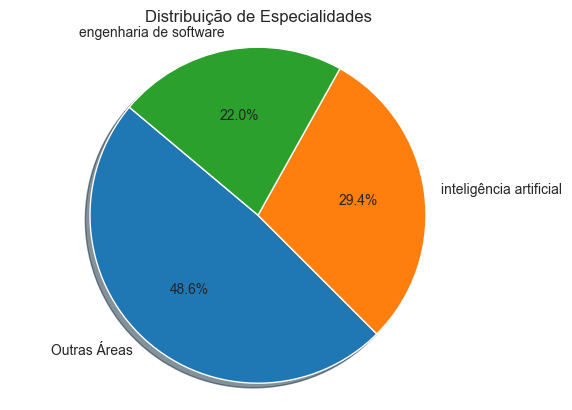

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_especialidade(especialidade):
    if especialidade in ['engenharia de software', 'inteligência artificial']:
        return especialidade
    else:
        return 'Outras Áreas'

dados_teste['CATEGORIA'] = dados_teste['ESPECIALIDADE'].apply(categorize_especialidade)

counts_categoria = dados_teste['CATEGORIA'].value_counts().reset_index()
counts_categoria.columns = ['CATEGORIA', 'counts']

plt.pie(counts_categoria['counts'], labels=counts_categoria['CATEGORIA'], autopct='%1.1f%%', startangle=140,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'], shadow=True)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribuição de Especialidades')
# plt.savefig('imagens/espec_categorias_pizza.eps', dpi=600, bbox_inches='tight')
plt.show()

In [29]:
dados_teste['CATEGORIA'].value_counts()

Outras Áreas               6552
inteligência artificial    3960
engenharia de software     2965
Name: CATEGORIA, dtype: int64

## K-means

In [30]:
from sklearn.cluster import KMeans

In [31]:
dataset = dados.query('PRESENTE == "S"')
dataset_kmeans = dataset.iloc[:,33:36]
dataset_kmeans

,matematica,fundamentos_computacao,tecnologia_computacao
0,14.0,21.0,10.0
1,16.0,22.0,12.0
2,4.0,16.0,8.0
3,4.0,13.0,7.0
4,6.0,15.0,11.0
...,...,...,...
13470,14.0,16.0,8.0
13471,10.0,16.0,9.0
13472,9.0,18.0,8.0
13473,10.0,16.0,6.0


### Padronizando os dados

In [32]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_dataset_kmeans = min_max_scaler.fit_transform(dataset_kmeans)

### Encontrar o número ideal de cluster

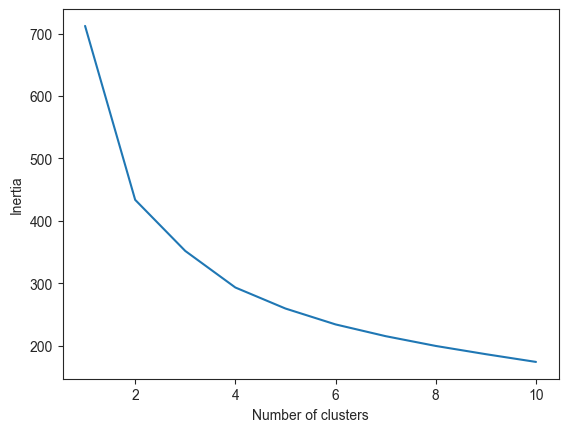

In [34]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset_kmeans)

    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_dataset_kmeans)

    score = silhouette_score(X_dataset_kmeans, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

bic_values = []
aic_values = []

sns.set_palette(["blue", "red"])

for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_dataset_kmeans)
    

    bic_values.append(gmm.bic(X_dataset_kmeans))
    aic_values.append(gmm.aic(X_dataset_kmeans))

plt.plot(range(1, 11), bic_values, label="BIC")
plt.plot(range(1, 11), aic_values, label="AIC")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('scores', fontsize=14)
plt.xlabel('número de clusters', fontsize=14)
legend = plt.legend(title='Critérios', fontsize=12)
legend.get_title().set_fontsize(14)
plt.savefig('imagens/metodoBIC_AIC.eps', dpi=400, bbox_inches='tight', format='eps')
plt.show()

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(X_dataset_kmeans)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(wcss, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

### Aplicação do K-meas

In [140]:
model = KMeans(n_clusters=3, n_init=20,max_iter=300,init='k-means++')
labels = model.fit_predict(X_dataset_kmeans)
dataset.loc[:, 'cluster'] = model.predict(X_dataset_kmeans)
centroids = model.cluster_centers_

C:\Users\jeanc\AppData\Local\Temp\ipykernel_8956\3122017248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'cluster'] = model.predict(X_dataset_kmeans)


In [141]:
# Agrupar por cluster e especialidade, contando o número de ocorrências
cluster_specialty_counts = dataset.groupby(['cluster', 'ESPECIALIDADE']).size().reset_index(name='count')

# Encontrar a especialidade com a maior contagem para cada cluster
max_specialties = cluster_specialty_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

print(max_specialties)

         cluster            ESPECIALIDADE  count
cluster                                         
0              0  inteligência artificial   1308
1              1  inteligência artificial    987
2              2   engenharia de software   1114


In [142]:
centroids

array([[0.36709732, 0.50908166, 0.50988757],
       [0.60744135, 0.63400712, 0.51926523],
       [0.29807692, 0.39964703, 0.3113302 ]])

In [38]:
from sklearn import metrics
sse = model.inertia_
silhouette_avg = metrics.silhouette_score(dataset_kmeans, labels)

print("SSE:", sse)
print("Coeficiente de Silhueta:", silhouette_avg)

SSE: 351.8129314006923
Coeficiente de Silhueta: 0.23216835291104668


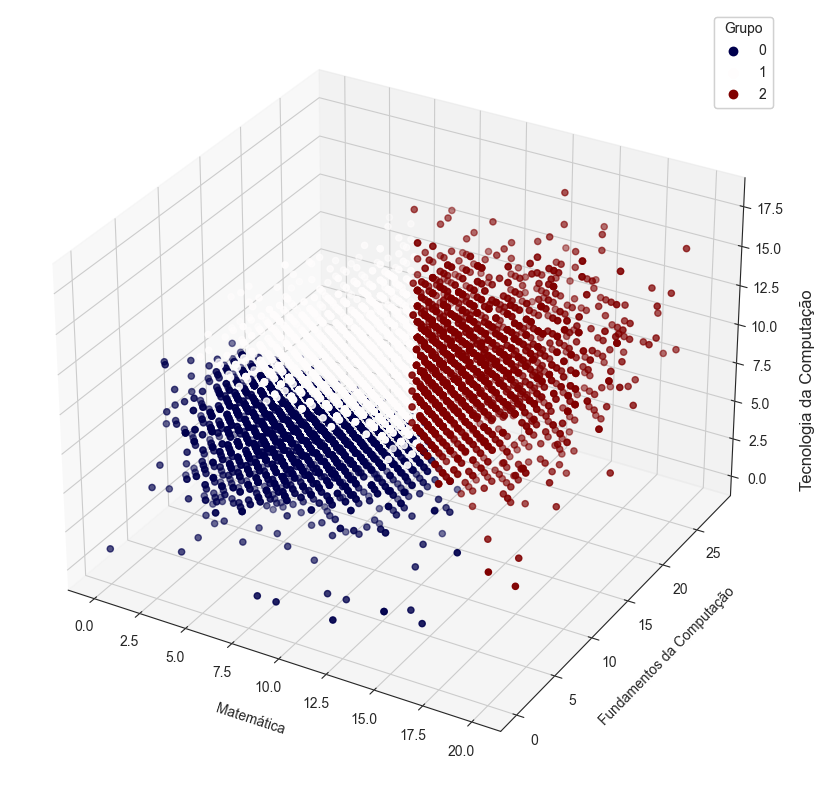

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(dataset['matematica'], dataset['fundamentos_computacao'],
                    dataset['tecnologia_computacao'], c=dataset['cluster'], cmap='seismic')

ax.set_xlabel('Matemática', labelpad=10)
ax.set_ylabel('Fundamentos da Computação', labelpad=10)
fig.text(0.85, 0.5, 'Tecnologia da Computação', va='center', rotation='vertical', fontsize=12)

legend1 = ax.legend(*sctt.legend_elements(), title='Grupo')
ax.add_artist(legend1)

# plt.savefig('imagens/grafico_kmeans.eps', dpi=300, bbox_inches='tight', format='eps')

plt.show()

         cluster            ESPECIALIDADE  count
cluster                                         
0              0   engenharia de software   1114
1              1  inteligência artificial    987
2              2  inteligência artificial   1308


#### Metricas do desempenho do algoritmo

In [40]:
from sklearn.metrics import pairwise_distances

# Soma dos Quadrados dos Erros (SSE):
def calculate_sse(data, labels, centroids):
    distances = pairwise_distances(data, centroids, metric='euclidean')
    sse = 0
    for i, label in enumerate(labels):
        sse += distances[i][label] ** 2
    return sse

In [41]:
# Coeficiente de Silhueta:
from sklearn.metrics import silhouette_score

def calculate_silhouette(data, labels):
    silhouette = silhouette_score(data, labels)
    return silhouette

In [42]:
# Índice de Davies-Bouldin:
def calculate_davies_bouldin(data, labels, centroids):
    distances = pairwise_distances(centroids, centroids, metric='euclidean')
    n_clusters = len(np.unique(labels))
    cluster_distances = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        centroid_distances = pairwise_distances(cluster_points, [centroids[i]], metric='euclidean')
        cluster_distances[i] = np.mean(centroid_distances)
    db_index = np.sum(distances) / np.max(cluster_distances)
    return db_index


In [43]:
# Índice de Calinski-Harabasz:
from sklearn.metrics import calinski_harabasz_score

def calculate_calinski_harabasz(data, labels):
    ch_index = calinski_harabasz_score(data, labels)
    return ch_index


In [44]:
# Índice de Dunn:
import numpy as np

def calculate_dunn(data, labels):
    distances = pairwise_distances(data, metric='euclidean')
    max_intra_cluster_distance = np.max([np.max(distances[labels == label][:, labels == label]) for label in np.unique(labels)])
    min_inter_cluster_distance = np.min([np.min(distances[labels == label][:, labels != label]) for label in np.unique(labels)])
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index


In [45]:
distances = pairwise_distances(X_dataset_kmeans, centroids, metric='euclidean')
sse = np.sum(np.min(distances, axis=1))

# Calcular Coeficiente de Silhueta
silhouette = silhouette_score(X_dataset_kmeans, labels)

# Calcular Índice de Davies-Bouldin
davies_bouldin = calculate_davies_bouldin(X_dataset_kmeans, labels, centroids)

# Calcular Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_dataset_kmeans, labels)

# Calcular Índice de Dunn
dunn = calculate_dunn(X_dataset_kmeans, labels)

# Imprimir os resultados
print(f"SSE: {sse}")
print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Dunn: {dunn}")

SSE: 1795.653493219531
Coeficiente de Silhueta: 0.254732780654014
Índice de Davies-Bouldin: 10.16262975217379
Índice de Calinski-Harabasz: 5623.430258885496
Índice de Dunn: 0.032368656421137676


IndexError: list index out of range

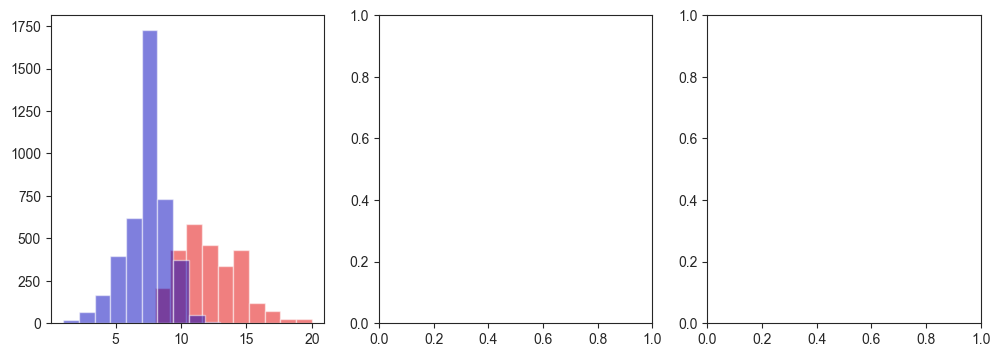

In [46]:
import matplotlib.colors as mcolors
column_labels = {
    'matematica': 'Matemática',
    'fundamentos_computacao': 'Fundamentos da Computação',
    'tecnologia_computacao': 'Tecnologia da Computação'
}
colors = ['#E30000', '#0000BC', ]  # Azul e Vermelho

cmap = mcolors.LinearSegmentedColormap.from_list('custom_seismic', colors, N=dataset['cluster'].nunique())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, coluna in enumerate(['matematica', 'fundamentos_computacao', 'tecnologia_computacao']):
    ax = axes[i]
    
    for idx, cluster in enumerate(dataset['cluster'].unique()):
        subset = dataset[dataset['cluster'] == cluster]
        color = colors[idx]  # Seleciona a cor da paleta 'seismic' para cada cluster
        ax.hist(subset[coluna], bins=10, alpha=0.5, label=f'Cluster {cluster}', color=color)
    
    # ax.set_title(f'Histograma de {coluna} por cluster')
    ax.set_xlabel(column_labels[coluna], fontsize=18)
    ax.set_ylabel('Frequência', fontsize=18)
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Definir tamanho dos rótulos dos eixo


plt.tight_layout()

plt.savefig('imagens/histograma', dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

disciplinas = ['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear', 'Geometria Analítica',
               'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática',
               'Organização de Arquivos e Dados', 'Técnicas de Programação', 'Circuitos Digitais',
               'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
               'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais',
               'Arquitetura e Organização de Computadores', 'Redes de Computadores', 'Computação Gráfica',
               'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos', 'Compiladores',
               'Processamento de Imagens', 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        max_mean = mean_by_year.max()  # Encontra o valor máximo nas médias para normalização
        normalized_mean = mean_by_year / max_mean * 100  # Normaliza as médias em porcentagem
        ax.plot(normalized_mean.index, normalized_mean.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho (%)')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
disciplinas = ['Matemática Discreta',
 'Cálculo Diferencial e Integral',
 'Álgebra Linear',
 'Geometria Analítica',
 'Análise Combinatória',
 'Probabilidade e Estatística',
 'Lógica Matemática',
 'Organização de Arquivos e Dados',
 'Técnicas de Programação',
 'Circuitos Digitais',
 'Análise de Algoritmos',
 'Teoria dos Grafos',
 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados',
 'Linguagens de Programação',
 'Sistemas Operacionais',
 'Arquitetura e Organização de Computadores',
 'Redes de Computadores',
 'Computação Gráfica',
 'Inteligência Artificial',
 'Engenharia de Software',
 'Sistemas Distribuídos',
 'Compiladores',
 'Processamento de Imagens',
 'Banco de Dados']

num_disciplinas = len(disciplinas)
num_clusters = len(dataset['cluster'].unique())

# Definindo as cores da paleta 'seismic' para representar os clusters
cluster_colors = ['b', 'r']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))

for i, disciplina in enumerate(disciplinas):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    for cluster, color in zip(range(num_clusters), cluster_colors):
        data = dataset[dataset['cluster'] == cluster]
        mean_by_year = data.groupby('ANO')[disciplina].mean()
        ax.plot(mean_by_year.index, mean_by_year.values, marker='o', label=f'Cluster {cluster}', color=color)
    
    ax.set_title(disciplina)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média de Desempenho')
    ax.legend()

if num_disciplinas < 25:
    for i in range(num_disciplinas, 25):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('imagens/desempenhoCluster.eps', dpi=600)
plt.show()


In [ ]:
# Calcular a média do desempenho por grupo (por exemplo, gênero)
mean_performance_by_gender = dataset.groupby('SEXO')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].mean()
print(mean_performance_by_gender)

In [ ]:
mean_math_by_presence = dados.groupby('PRESENTE')['matematica'].mean()
print(mean_math_by_presence)

In [ ]:
# Calcular as estatísticas descritivas das variáveis em cada cluster
cluster_stats = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].describe()
cluster_stats

In [ ]:
cluster_corr = dataset.groupby('cluster')[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']].corr()

sns.heatmap(cluster_corr, annot=True)
plt.title('Matriz de correlação por cluster')
plt.show()


### Analise

In [ ]:
def create_bar_chart(data, x, y, xlabel='', ylabel='', figsize=(0, 0), rotation=0, fontsize=0, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def create_bar_chart_porcent(data, x, y, xlabel='', ylabel='', figsize=(8, 4), fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    total = data[y].sum()
    data['porcentagem'] = (data[y] / total) * 100

    sns.barplot(
        x='porcentagem', 
        y=x,
        data=data,
        color='#69b3a2'
    )
    plt.xlim(right=10)

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout() 

    for index, row in data.iterrows():
        plt.text(row.porcentagem, index, f'{row.porcentagem:.2f}%', ha='left', va='center', fontsize=fontsize)

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
temas = ['Matemática Discreta', 'Cálculo Diferencial e Integral',
       'Álgebra Linear', 'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados']

In [ ]:
media_disciplina = dataset.iloc[:,7:32]
# media_disciplina = pd.DataFrame(media_disciplina.mean().sort_values(ascending=False), columns=['media'])
# media_disciplina = media_disciplina.reset_index()
media_disciplina

In [ ]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoAbsoluto'] = media_disciplina[tema]

In [ ]:
for tema in temas:
    media_disciplina[f'{tema}_AcertoRelativo'] = media_disciplina[f'{tema}_AcertoAbsoluto'] / media_disciplina[tema].max() * 100

In [ ]:
media_acertos = {}
for tema in temas:
    media_acertos[tema] = media_disciplina[f'{tema}_AcertoRelativo'].mean()

In [ ]:
data = pd.DataFrame({'Tema': media_acertos.keys(), 'Média de Acerto (%)': media_acertos.values()})

data = data.sort_values('Média de Acerto (%)', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=data, y='Tema', x='Média de Acerto (%)', color='#0000BC')
plt.xlabel('Média de Acerto (%)', fontsize=14)
plt.ylabel('')
# plt.title('Média de Acerto por Tema')
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

plt.xlim(right=100)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=14)

plt.tight_layout()
plt.savefig('imagens/disci_mediaGeral2.pdf')
plt.show()

In [ ]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

statistics_tecnologia = cluster_stats['tecnologia_computacao']

In [ ]:
statistics_matematica

In [ ]:
statistics_fundamentos

In [ ]:
statistics_tecnologia

In [ ]:
import pandas as pd

# Calculando as estatísticas por cluster
cluster_stats = dataset.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Exemplo de estatísticas para a variável 'matematica'
statistics_matematica = cluster_stats['matematica']

# Exemplo de estatísticas para a variável 'fundamentos_computacao'
statistics_fundamentos = cluster_stats['fundamentos_computacao']

# Exemplo de estatísticas para a variável 'tecnologia_computacao'
statistics_tecnologia = cluster_stats['tecnologia_computacao']

# Exemplo de estatísticas para várias variáveis
statistics_variaveis = cluster_stats[['matematica', 'fundamentos_computacao', 'tecnologia_computacao']]

# Exemplo de estatísticas específicas para um cluster específico
cluster1_stats = cluster_stats.loc[1]  # Estatísticas para o Cluster 1

# Exemplo de cálculo de proporção de cada cluster
cluster_proportions = dataset['cluster'].value_counts(normalize=True)

# Exemplo de estatísticas gerais do dataset inteiro
dataset_stats = dataset.describe()


In [ ]:
def plot_stacked_bar_chart(df, category_col, value_col, title, save_path=None):
    top_specialties = df[category_col].value_counts().head(10).index.tolist()

    df_top = df[df[category_col].isin(top_specialties)]

    df_grouped = df_top.groupby([category_col, 'SEXO']).size().unstack()

    df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values().index]

    ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

    ax.set_title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout() 
    ax.legend(['Feminino', 'Masculino'], loc='lower right')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()

In [ ]:
def plot_faixa_etaria(dataset, save_path=None):
    faixa_etaria_counts = dataset['IDADE'].value_counts().sort_index()

    faixas_etarias = faixa_etaria_counts.index.tolist()

    plt.bar(faixas_etarias, faixa_etaria_counts)

    plt.xlabel('Faixa Etária')
    plt.ylabel('Número de Candidatos')
    plt.title('Distribuição de Faixa Etária dos Candidatos')
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cluster_nomeada = {
    0: 'inteligência artificial',
    1: 'engenharia de software'
}

In [ ]:
dataset_confusion = dataset.query('ESPECIALIDADE == "inteligência artificial" | ESPECIALIDADE == "engenharia de software"')

In [ ]:
dataset_confusion['cluster'] = dataset_confusion['cluster'].replace(cluster_nomeada)

In [ ]:
dataset_confusion

In [ ]:
y_teste = dataset_confusion['ESPECIALIDADE']
y_pred = dataset_confusion['cluster']

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['inteligência artificial', 'engenharia de software'],
            yticklabels=['inteligência artificial', 'engenharia de software'])
plt.xlabel('Previsão')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')
plt.savefig('imagens/matriz_confusão.png', dpi=600)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia
acuracia = accuracy_score(y_teste, y_pred)
print("Acurácia:", acuracia)

In [ ]:
acuracia_porcentagem = acuracia * 100

print("Acurácia:", acuracia_porcentagem, "%")

#### Grupo 0

In [ ]:
dataset_g0 = dataset.query('cluster == 0')

In [ ]:
especialidades_gZero = dataset_g0['ESPECIALIDADE'].value_counts()[:10]
especialidades_gZero = pd.DataFrame(especialidades_gZero)

In [ ]:
def create_bar_areas(data, x, y, xlabel='', ylabel='', figsize=(10, 4), rotation=0, fontsize=12, save_path=None):
    sns.set_style(style="ticks")
    plt.figure(figsize=figsize)

    # Plotar um gráfico de barras
    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#0000BC'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [ ]:
create_bar_chart(
    data=especialidades_gZero,
    x='ESPECIALIDADE',
    y=especialidades_gZero.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoZero.eps'
)

In [ ]:
media_disciplina_zero = dataset_g0.iloc[:,7:32]
media_disciplina_zero = pd.DataFrame(media_disciplina_zero.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_zero = media_disciplina_zero.reset_index()

In [ ]:
grouped_data = dataset_g0.groupby('ESTADO')['ESPECIALIDADE'].value_counts()
grouped_data

In [ ]:
plot_stacked_bar_chart(dataset_g0, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexo')

In [ ]:
# import pandas as pd

# # Substituir os valores numéricos dos estados pelos nomes
# dataset_g0['ESTADO'] = dataset_g0['ESTADO'].map(estados)

# # Agrupar os dados por estado e especialidade, e contar as ocorrências
# grouped_data = dataset_g0.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='Contagem')

# # Criar um DataFrame para armazenar os resultados
# resultados = pd.DataFrame(columns=['Estado', 'Especialidades'])

# # Iterar sobre os estados
# for estado in dataset_g0['ESTADO'].unique():
#     # Filtrar os dados do estado atual
#     df_estado = grouped_data[grouped_data['ESTADO'] == estado]
    
#     # Filtrar as quatro primeiras especialidades mais solicitadas
#     top_especialidades = df_estado.nlargest(4, 'Contagem')
    
#     # Criar uma lista com as especialidades formatadas
#     especialidades = [f"{especialidade}: {contagem}" for especialidade, contagem in zip(top_especialidades['ESPECIALIDADE'], top_especialidades['Contagem'])]
    
#     # Adicionar o resultado ao DataFrame
#     resultados = resultados.append({'Estado': estado, 'Especialidades': ', '.join(especialidades)}, ignore_index=True)

# # Exibir o DataFrame de resultados

# resultados.to_csv('resultados.txt', sep='\t', index=False)


In [ ]:
plot_faixa_etaria(dataset_g0, 'imagens/distribuicao_faixaEtaria')

#### Grupo 1

In [ ]:
dataset_g1 = dataset.query('cluster == 1')

In [ ]:
especialidades_gOne = dataset_g1['ESPECIALIDADE'].value_counts()[:10]
especialidades_gOne = pd.DataFrame(especialidades_gOne)

In [ ]:
create_bar_chart(
    data=especialidades_gOne,
    x='ESPECIALIDADE',
    y=especialidades_gOne.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

In [ ]:
media_disciplina_one = dataset_g1.iloc[:,7:32]
media_disciplina_one = pd.DataFrame(media_disciplina_one.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_one = media_disciplina_one.reset_index()
# media_disciplina_one

In [ ]:
# Chamar o método para criar o gráfico de barras empilhadas
plot_stacked_bar_chart(dataset_g1, 'ESPECIALIDADE', 'SEXO', '', 'imagens/distribuicao_especialidade_sexoG1')

In [ ]:
plot_faixa_etaria(dataset_g1, 'imagens/distribuicao_faixaEtariaG1')

#### Grupo 2

In [ ]:
dataset_g2 = dataset.query('cluster == 2')

In [ ]:
especialidades_gTwo = dataset_g2['ESPECIALIDADE'].value_counts()[:10]
especialidades_gTwo = pd.DataFrame(especialidades_gTwo)

In [ ]:
create_bar_chart(
    data=especialidades_gTwo,
    x='ESPECIALIDADE',
    y=especialidades_gTwo.index,
    figsize=(8, 4),
    rotation=0,
    fontsize=18,
    save_path='imagens/espec_grupoOne.eps'
)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dataset_DBSCAN = dados.iloc[:,33:36]
dataset_DBSCAN.head(1)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(dataset_DBSCAN)

print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_DBSCAN['matematica'], dataset_DBSCAN['fundamentos_computacao'], dataset_DBSCAN['tecnologia_computacao'], c=labels)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com DBSCAN")
plt.show()

## Spectral Clustering

In [ ]:
dataset_sp = dados.iloc[:,33:36]
dataset_sp.head(1)

In [ ]:
# from sklearn.cluster import SpectralClustering

# spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
# labels_spectral = spectral.fit_predict(dataset_sp)

# print("Rótulos atribuídos:", labels_spectral)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dataset_sp['matematica'], dataset_sp['fundamentos_computacao'], dataset_sp['tecnologia_computacao'], c=labels_spectral)
# ax.set_xlabel("Feature 1")
# ax.set_ylabel("Feature 2")
# ax.set_zlabel("Feature 3")
# ax.set_title("Clustering com DBSCAN")
# plt.show()

## Agglomerative clustering

In [ ]:
dataset_agglomerative = dados.iloc[:,33:36]
dataset_agglomerative.head(1)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
labels_agglomerative = agglomerative.fit_predict(dataset_agglomerative)


print("Rótulos atribuídos:", labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_agglomerative['matematica'], dataset_agglomerative['fundamentos_computacao'], dataset_agglomerative['tecnologia_computacao'], c=labels_agglomerative)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Clustering com Agglomerative Clustering")
plt.show()

# Aplicações de Aprendizado de Máquina

### Árvore de Decisão

In [ ]:
# dados['PRESENTE'].unique()
dataframe_arvore = dataset.query('PRESENTE == "S"')

In [ ]:
dataframe_arvore = dataframe_arvore.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao', 'cluster']]
dataframe_arvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

X = dataframe_arvore.drop('cluster', axis=1)  # Remova a coluna 'classe_alvo' do DataFrame
y = dataframe_arvore['cluster']  # Coluna 'classe_alvo' é a classe alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisão: {:.2f}%".format(accuracy * 100))


dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=list(map(str, y.unique())),
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("arvore_decisao")
graph.view()

#### Testar a funcionalidade do algoritmo

In [ ]:
novo_poscomp = pd.read_csv('novo_poscomp.csv')
novo_poscomp.columns = ['Nome','Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos','NOTA Prova TO']

In [ ]:
list_poscomp = ['Álgebra Linear','Análise Combinatória','Cálculo Diferencial e Integral','Geometria Analítica','Matemática Discreta','Probabilidade e Estatística','Lógica Matemática','Análise de Algoritmos','Algoritmos e Estruturas de Dados','Arquitetura e Organização de Computadores','Circuitos Digitais','Linguagens de Programação','Linguagens Formais, Autômatos e Computabilidade','Organização de Arquivos e Dados','Sistemas Operacionais','Técnicas de Programação','Teoria dos Grafos','Banco de Dados','Compiladores','Computação Gráfica','Engenharia de Software','Inteligência Artificial','Processamento de Imagens','Redes de Computadores','Sistemas Distribuídos']

In [ ]:
novo_poscomp = novo_poscomp.drop('NOTA Prova TO', axis=1)

In [ ]:
novo_poscomp.head()

In [ ]:
for coluna in list_poscomp:
    novo_poscomp[coluna] = pd.to_numeric(novo_poscomp[coluna], errors='coerce').astype('Int64')

# Verificar o tipo de dado das colunas após a conversão
print(novo_poscomp.dtypes)

In [ ]:
novo_poscomp = novo_poscomp.dropna()

In [ ]:
novo_poscomp['matematica'] = novo_poscomp.loc[:,['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear',
 'Geometria Analítica', 'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática']].sum(axis=1)

In [ ]:
novo_poscomp['fundamentos_computacao'] = novo_poscomp.loc[:,['Organização de Arquivos e Dados','Técnicas de Programação',
 'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais', 'Arquitetura e Organização de Computadores']].sum(axis=1)

In [ ]:
novo_poscomp['tecnologia_computacao'] = novo_poscomp.loc[:,['Redes de Computadores', 'Computação Gráfica',
                                                   'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos',
                                                   'Compiladores', 'Processamento de Imagens', 'Banco de Dados']].sum(axis=1)

In [ ]:
X_novos = novo_poscomp.loc[:,['matematica','fundamentos_computacao','tecnologia_computacao']]

In [ ]:
X_novos.head()

In [ ]:
# Fazer previsões com o novo conjunto de dados
classe_prevista = clf.predict(X_novos)

# Exibir a classe prevista
print("Classe prevista: {}".format(classe_prevista))